# Imports de las librerias usadas.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from apyori import apriori

# Leer datasets

In [9]:
dataframe = pd.read_csv("dataset.csv")
dataframe.head()    

,Date,Time,Username,Mac Address,Access Point
0,17/10/2021,23:23:39,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
1,17/10/2021,23:23:39,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
2,17/10/2021,23:24:10,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
3,17/10/2021,23:24:10,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
4,17/10/2021,23:24:41,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2


## Visualización
Histograma de la cantidad de records con cada username encontrado en el dataset.

Username
CTI\ivaleriano       AxesSubplot(0.125,0.125;0.775x0.755)
caril.martinez       AxesSubplot(0.125,0.125;0.775x0.755)
cti\danny.torres     AxesSubplot(0.125,0.125;0.775x0.755)
cti\xavier.aizaga    AxesSubplot(0.125,0.125;0.775x0.755)
fernando.campana     AxesSubplot(0.125,0.125;0.775x0.755)
gjimenez             AxesSubplot(0.125,0.125;0.775x0.755)
gonzalo.mendez       AxesSubplot(0.125,0.125;0.775x0.755)
humberto.guale       AxesSubplot(0.125,0.125;0.775x0.755)
ivaleriano           AxesSubplot(0.125,0.125;0.775x0.755)
leonardo.eras        AxesSubplot(0.125,0.125;0.775x0.755)
nelson.carrera       AxesSubplot(0.125,0.125;0.775x0.755)
oscar.moreno         AxesSubplot(0.125,0.125;0.775x0.755)
patricio.mendoza     AxesSubplot(0.125,0.125;0.775x0.755)
xavier.aizaga        AxesSubplot(0.125,0.125;0.775x0.755)
yandrade             AxesSubplot(0.125,0.125;0.775x0.755)
Name: Username, dtype: object

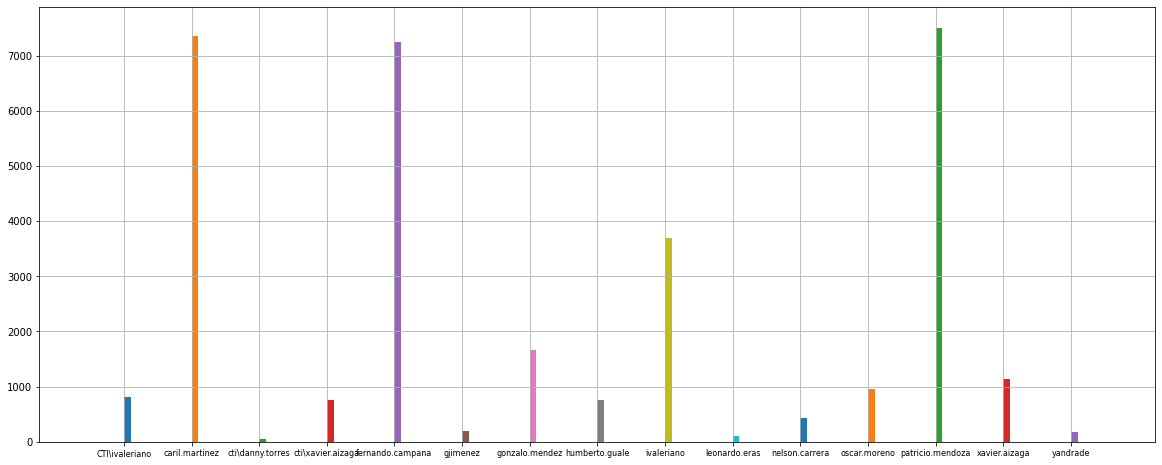

In [48]:
dataframe.groupby("Username")["Username"].hist(figsize=(20,8),xlabelsize=8)

# Algoritmo Apriori
Este algoritmo fue desarrollado por R. Agrawal y R. Srikant en 1994 para poder encontrar conjuntos de item frecuentes dentro de un dataset para crear reglas de asociaciones. [1]

Esta es una tecnica muy usada dentro de la mineria de datos para encontrar relaciones desconocidas, produciendo resultados que pueden ser usados en toma de decisiones o predicciones. Una de sus deventajas es el tiempo que toma en procesar toda la información del dataset.[2]

Al finalizar el analisis se mostrara la siguiente información:

```
Rule: A -> B
Support: 0.061261754770382544
Confidence: 0.02017712042362823
Lift: 8.885613845321796
```

Rule: Regla de asociación A -> B

Support: Porcentaje de conjuntos donde la regla fue verdadera (Frecuencia donde A estaba asociada a B)

Confidence: Porcentaje en el que la regla es verdadera, solo cuando el elemento A ocurre. (Que tan seguido A y B aparecen juntos basado en el numero de ocurrencias de A)

Lift: Mide cuan mas frecuente A es encontrada con B en comparación a cuando no esta B.

## Creación de records para creación de modelo
Para poder entrenar el modelo y obtener resultados debemos crear conjuntos de elementos que tendran esta asociacion implicita. Como nosotros queremos encontrar asociación entre la Mac Address y el Username de los clientes, dejamos estas dos columnas para su análisis. En caso de querer encontrar mas asociaciones podriamos dejar mas información como el AP al que esta conectado.

In [36]:
#df_train, df_test = train_test_split(dataframe, test_size=0.33, random_state=42)

#df_train_user_mac = df_train.drop(columns=['Date','Time','Access Point'])
#df_test_user_mac = df_test.drop(columns=['Date','Time','Access Point'])
 
df_train_user_mac = dataframe.drop(columns=['Date','Time','Access Point'])

records_train = df_train_user_mac.to_records(index=False)
#records_test = df_test_user_mac.to_records(index=False)

print(list(records_train)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:

## Ejecución del algoritmo
A partir de la información organizada ingresamos el algoritmo que ira aprendiendo y generando reglas de asociación para las instancias que encuentra. Luego recorremos estas reglas y las mostramos por consola.

In [37]:
association_rules = apriori(records_train, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results = list(association_rules)

for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: "+ items[0] + " -> "+items[1])
    print("Support: "+ str(item[1])) #Individual popularity (ItemA/TotalTransactions)
    print("Confidence: "+str(item[2][0][2])) #Item A Will include more profit for item B (Item (A+B)/Item (A))
    print("Lift: " + str(item[2][0][3])) #How much Item A includes profit in item B (Confidence/Support)
    print("========================================")

Rule: 04:1b:ba:7f:c9:27 -> ivaleriano
Support: 0.061261754770382544
Confidence: 1.0
Lift: 8.885613845321796
Rule: gonzalo.mendez -> 0a:32:e1:06:a2:89
Support: 0.021577041297665783
Confidence: 1.0
Lift: 19.72328931572629
Rule: humberto.guale -> 14:56:8e:f1:0a:79
Support: 0.022916096046745184
Confidence: 1.0
Lift: 43.63745019920319
Rule: 30:07:4d:99:9d:38 -> gjimenez
Support: 0.005477951246233908
Confidence: 1.0
Lift: 170.2538860103627
Rule: CTI\ivaleriano -> 3c:91:80:2d:8c:b3
Support: 0.024772512857968897
Confidence: 0.7872340425531915
Lift: 31.77852998065764
Rule: 4c:d1:a1:b4:60:2d -> nelson.carrera
Support: 0.013268815240877689
Confidence: 0.8952772073921971
Lift: 67.47227926078028
Rule: 6a:3f:63:6d:5b:f9 -> xavier.aizaga
Support: 0.028941842417602483
Confidence: 1.0
Lift: 29.001765225066194
Rule: 7a:50:6c:eb:e5:f9 -> gonzalo.mendez
Support: 0.008947320368848717
Confidence: 1.0
Lift: 19.72328931572629
Rule: 9c:5a:81:cb:00:23 -> ivaleriano
Support: 0.04236282297087556
Confidence: 1.0
L

## Resultados
Como podemos observar en el punto anterior se han creado reglas de asociación que nos permite identificar una mac address con un nombre de usuario debido a su frecuencia en el dataset. Así mismo se nos muestra su soporte y confianza.

# Referencias
[1] GeeksforGeeks. 2021. Apriori Algorithm - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/apriori-algorithm/> [Accessed 3 November 2021].

[2] M. Al-Maolegi en B. Arkok, “An improved Apriori algorithm for association rules”, arXiv preprint arXiv:1403. 3948, 2014. 